In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names) # create a dataframe from the data in iris with appropirate column names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Lets take a look at the shape of our dataset, and get a description and some information about the data.

In [28]:
df.shape

(150, 4)

our data has 150 rows and 4 columns

In [29]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Our data is all float values and has no null values, meaning no data is missing.

We can also check for missing data using the following commands:

In [31]:
# lets check for missing data in the dataframe
missing_data = df.isna()
missing_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [32]:
missing_data_columns = df.isna().sum()
missing_data_columns

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [33]:
missing_data_total = df.isna().sum().sum()
missing_data_total

0

There is no missing data in the dataset.

Now that we know there is no missing data we can sort the data into some prenamed numpy arrays.

In [34]:
df.drop_duplicates(inplace=True)
df.shape 

(149, 4)

There is one duplicate as we can see by the one reduced row in the dataframe.  
We used inpace=True so the original dataframe is changed.  
Even though two flowers can have all 4 of the same attributes, we did this because that seems unlikely. A flower might have just been measured twice.  
Also, this one row does not affect the data much so either way plots should be fine.

In [35]:
sepal_length = df['sepal length (cm)']
sepal_width = df['sepal width (cm)']
petal_length = df['petal length (cm)']
petal_width = df['petal width (cm)']

Our data is all numerical. There are no categorical variables.  
However, we can still use our data's 4 features to search for any trends and thus output variables.

In [37]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

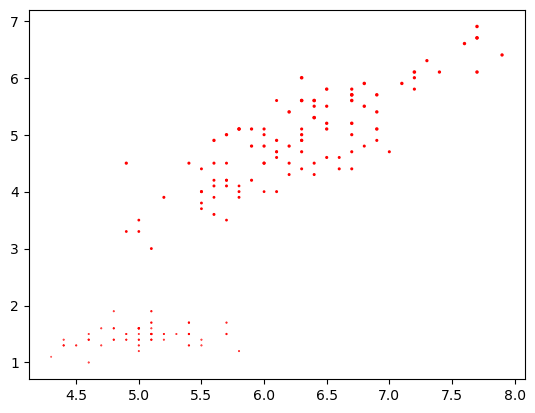

In [43]:
fig, ax1 = plt.subplots()
ax1.scatter(x=sepal_length, y=petal_length, color='red', s=petal_width) # s = size of the dots